## Linear Discriminant Analysis - LDA

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target # [0=setosa, 1=versicolor, 2=virginica]
features = iris.feature_names

df = pd.DataFrame(X, columns=features)

In [2]:
# create dict with classes
flowers = {
    'setosa': df[y==0],
    'versicolor': df[y==1],
    'virginica': df[y==2]
}

flowers_keys = list(flowers.keys())

# covariance matrix of each class
flowers_cov = dict()
for flower in flowers_keys:
    flowers_cov[flower] = pd.DataFrame.cov(flowers[flower])[:].values
    
# sw and sw inverse
sw = pd.DataFrame([[float(0) for a in range(4)] for b in range(4)])[:].values

for i in range(4):
    for j in range(4):
        sw[i][j] = flowers_cov['setosa'][i][j] + flowers_cov['versicolor'][i][j] + flowers_cov['virginica'][i][j]

swi = np.linalg.inv(sw)

# sb
sb = pd.DataFrame.cov(df)[:].values

# sw_inverse * sb
swi_sb = pd.DataFrame([[float(0) for a in range(4)] for b in range(4)])[:].values

for i in range(4):
    for j in range(4):   
        swi_sb[i][j] = swi[i][j] * sb[i][j]
        
# eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(swi_sb)

# transform in 2 dimensions
w = eigenvectors[:,[0,1]]
lda_X = X.dot(w)


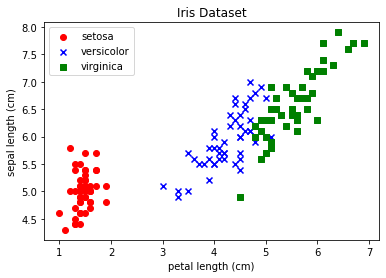

In [3]:
colors = ['red', 'blue','green']
classes = ['setosa', 'versicolor', 'virginica']
markers = ['o', 'x', 's']

for k in range(3):
    plt.scatter(
        x=df[y==k]['petal length (cm)'],
        y=df[y==k]['sepal length (cm)'],
        c=colors[k],
        marker=markers[k],
        label=classes[k]
    )
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.title('Iris Dataset')
plt.legend()

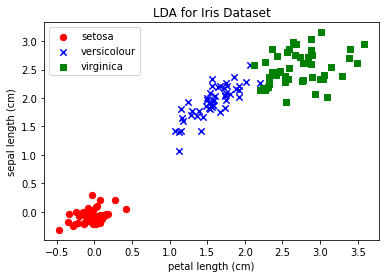

In [4]:
plt.scatter(lda_X[y == 0, 0], lda_X[y == 0, 1], marker='o', s=40, c = 'red', label = 'setosa')
plt.scatter(lda_X[y == 1, 1], lda_X[y == 1, 0], marker='x', s=40, c = 'blue', label = 'versicolour')
plt.scatter(lda_X[y == 2, 0], lda_X[y == 2, 1], marker='s', s=40, c = 'green', label = 'virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.title('LDA for Iris Dataset')
plt.legend()

## LDA using scikit

In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# fitting the LDA model
lda = LDA(n_components=2,solver='eigen')
lda_X = lda.fit(X,y).transform(X)

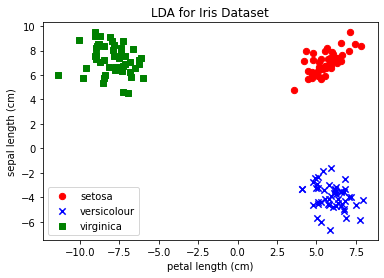

In [6]:
plt.scatter(lda_X[y == 0, 0], lda_X[y == 0, 1], marker='o', s=40, c = 'red', label = 'setosa')
plt.scatter(lda_X[y == 1, 1], lda_X[y == 1, 0], marker='x', s=40, c = 'blue', label = 'versicolour')
plt.scatter(lda_X[y == 2, 0], lda_X[y == 2, 1], marker='s', s=40, c = 'green', label = 'virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.title('LDA for Iris Dataset')
plt.legend()